In [1]:
### Including system path ### 

import os, sys
# Get the absolute path of the parent directory of the current notebook
notebook_dir = os.path.abspath('')
project_root = os.path.dirname(notebook_dir)  # Assumes the notebook is in root/notebooks

# Add the project root to the sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [27]:
from initialize import initialize_environment, initialize_agent, match_random_sound, format_target_json_from_state
from src.utils.config_manager import Config
import matplotlib.pyplot as plt
import json
import yaml
import numpy as np

# Load config
# script_dir = os.path.dirname(os.path.abspath(__file__))
script_dir = os.getcwd()
config = Config()
config_path = os.path.join(script_dir, "configs", "train_end_to_end.yaml")
config.load(config_path)

env = initialize_environment(config)
agent = initialize_agent(env, config)

[INFO] Built observer model with following architecture:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 87, 2)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 87, 16)       304       
                                                                 
 batch_normalization_10 (Bat  (None, 128, 87, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 43, 16)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 64, 43, 16)        0         
                                                                 
 c

In [12]:
env = match_random_sound(env, agent)

In [13]:
target_json = format_target_json_from_state(env)
print(json.dumps(target_json, indent=4))

{
    "target_audio_data": {
        "sample_rate": 44100.0,
        "bit_depth": 16,
        "samples": [
            0,
            0,
            0,
            0,
            0,
            -1,
            -2,
            -4,
            -5,
            -6,
            -7,
            -8,
            -8,
            -9,
            -10,
            -11,
            -12,
            -12,
            -13,
            -14,
            -14,
            -15,
            -15,
            -16,
            -16,
            -17,
            -17,
            -18,
            -18,
            -18,
            -18,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -19,
            -18,
            -18,
            -18,
            -17,
            -17,
            -17,
            -16,
            -16,
            -15,
           

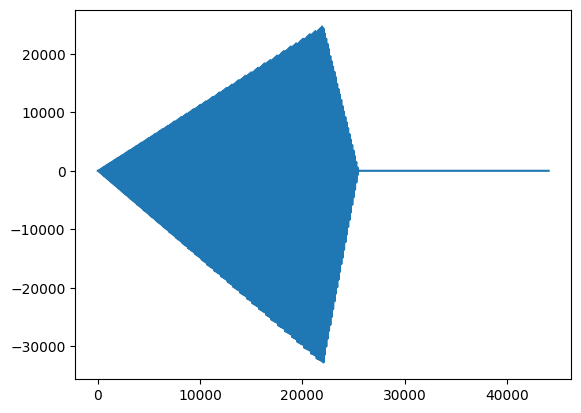

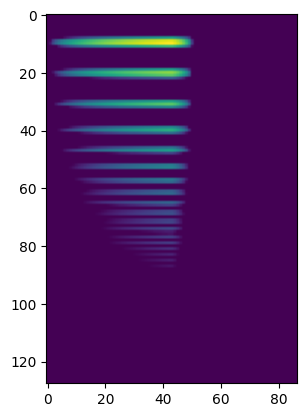

In [14]:
# Test output format with plots
extracted_sound_wave = target_json['target_audio_data']['samples']
extracted_spectrogram = target_json['target_spectrogram_data']['pixel_values']
plt.figure()
plt.plot(extracted_sound_wave)
plt.figure()
plt.imshow(extracted_spectrogram)

In [30]:
# Define new function
def format_matched_parameters(host_parameter_values, host_parameter_names, mapping_file):
    """
    Combines parameter names and values into a dictionary using a mapping loaded from a YAML file.

    Args:
        values (list): A list of parameter values.
        parameters (list): A list of parameter names.
        mapping_file (str): Path to the YAML file containing the parameter mapping.

    Returns:
        str: A JSON-formatted string with the combined parameters.
    """
    # Convert values to Python native types (e.g., float32 to float)
    host_parameter_values = [float(v) if isinstance(v, (np.float32, np.float64)) else v for v in host_parameter_values]

    # Load the mapping from the YAML file
    with open(mapping_file, "r") as file:
        yaml_data = yaml.safe_load(file)

    # Extract the mapping dictionary
    mapping = yaml_data["synth_parameter_mapping"]

    # Combine the values and mapped parameter names into a dictionary
    matched_parameters = {
        mapping[param]: value for param, value in zip(host_parameter_names, host_parameter_values)
    }

    return json.dumps({"matched_parameters": matched_parameters})


In [29]:
# Testing the new parameter function
parameter_values = env.current_params
param_names = env.param_names

mapping_file = os.path.join(script_dir, "configs", "synth_parameter_mapping.yaml")
output_json = format_matched_parameters(parameter_values, param_names, mapping_file)

# Print the result
print(output_json)

{'amplitude_attack': 0.7453824780934597, 'amplitude_decay': 0.09825875647547189, 'amplitude_sustain': 0.1568455907146472, 'amplitude_release': 0.3314338951235667, 'filter_cutoff_frequency': 0.8440275793996111}
{"matched_parameters": {"amplitude_attack": 0.7453824780934597, "amplitude_decay": 0.09825875647547189, "amplitude_sustain": 0.1568455907146472, "amplitude_release": 0.3314338951235667, "filter_cutoff_frequency": 0.8440275793996111}}
